# Rainfall Intensity Analysis Project
This notebook analyzes historical rainfall data in India (1901-2015) to predict rainfall intensity probabilities, compare them with theoretical distributions, and validate the Law of Large Numbers (LLN).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visual style
sns.set(style="whitegrid")

## 1. Data Loading and Preprocessing

In [12]:
# Load the dataset
df = pd.read_csv('/Users/kevinharvey/Desktop/Projects/Statistics Project/rainfall in india 1901-2015.csv')

# Drop rows with missing annual rainfall for accurate analysis
df = df.dropna(subset=['ANNUAL'])

print(f"Dataset shape after cleaning: {df.shape}")
df[['ANNUAL']].describe()

Dataset shape after cleaning: (4090, 19)


,ANNUAL
count,4090.000000
mean,1411.008900
std,903.846565
min,62.300000
25%,804.500000
50%,1121.300000
75%,1644.775000
max,6331.100000


## 2. Rainfall Intensity Probabilities
We define 'Rainfall Intensity' based on the annual rainfall amount. We'll categorize intensities using quantiles and calculate their probabilities.

In [13]:
# Define Intensity Categories based on Quantiles
quantiles = df['ANNUAL'].quantile([0.2, 0.4, 0.6, 0.8])
print("Intensity Thresholds (Quantiles):")
print(quantiles)

def categorize_intensity(x):
    if x <= quantiles[0.2]: return 'Very Low'
    elif x <= quantiles[0.4]: return 'Low'
    elif x <= quantiles[0.6]: return 'Moderate'
    elif x <= quantiles[0.8]: return 'High'
    else: return 'Extreme'

df['Intensity_Category'] = df['ANNUAL'].apply(categorize_intensity)

# Calculate Empirical Probabilities
intensity_counts = df['Intensity_Category'].value_counts()
intensity_probs = intensity_counts / len(df)
print("\nEmpirical Probabilities of Rainfall Intensities:")
print(intensity_probs)

# Probability of Exceeding a certain threshold (e.g., 2000mm)
threshold = 2000
prob_exceed = (df['ANNUAL'] > threshold).mean()
print(f"\nProbability of annual rainfall intensity exceeding {threshold}mm: {prob_exceed:.4f}")

Intensity Thresholds (Quantiles):
0.2     738.58
0.4     992.72
0.6    1278.02
0.8    2189.54
Name: ANNUAL, dtype: float64

Empirical Probabilities of Rainfall Intensities:
Intensity_Category
Extreme     0.2
High        0.2
Moderate    0.2
Low         0.2
Very Low    0.2
Name: count, dtype: float64

Probability of annual rainfall intensity exceeding 2000mm: 0.2108


## 3. Comparison with Theoretical Distributions
We will fit Normal and Gamma distributions to the rainfall intensity data.

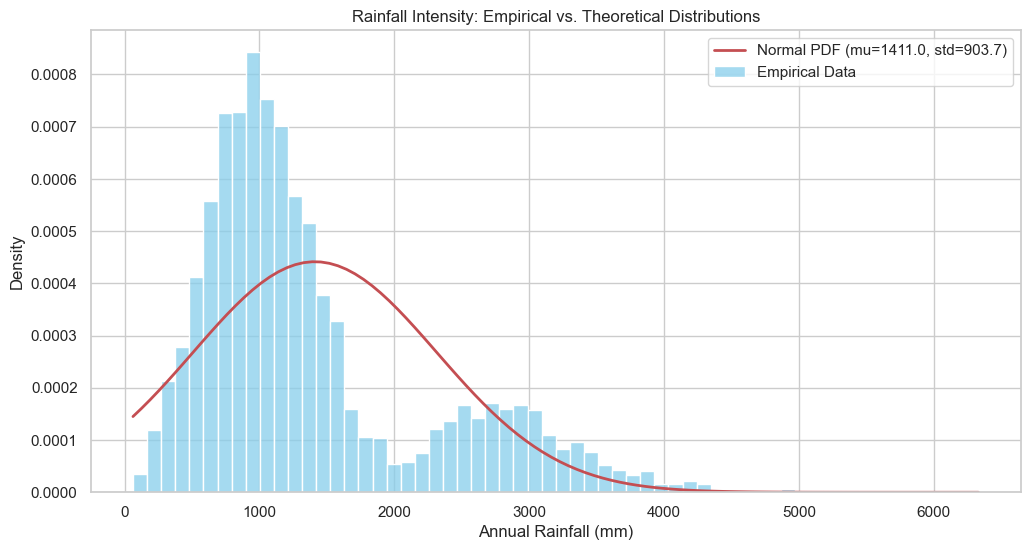

In [14]:
annual_data = df['ANNUAL']

# Fit Normal Distribution
mu, std = stats.norm.fit(annual_data)

# Visualize Comparison
plt.figure(figsize=(12, 6))
sns.histplot(annual_data, kde=False, stat="density", color='skyblue', label='Empirical Data')

x = np.linspace(annual_data.min(), annual_data.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, std), 'r-', lw=2, label=f'Normal PDF (mu={mu:.1f}, std={std:.1f})')

plt.title('Rainfall Intensity: Empirical vs. Theoretical Distributions')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Density')
plt.legend()
plt.show()

## 4. Law of Large Numbers (LLN) Validation
The Law of Large Numbers states that as the sample size increases, the sample mean converges to the population mean.

Population Mean of Annual Rainfall: 1411.01 mm


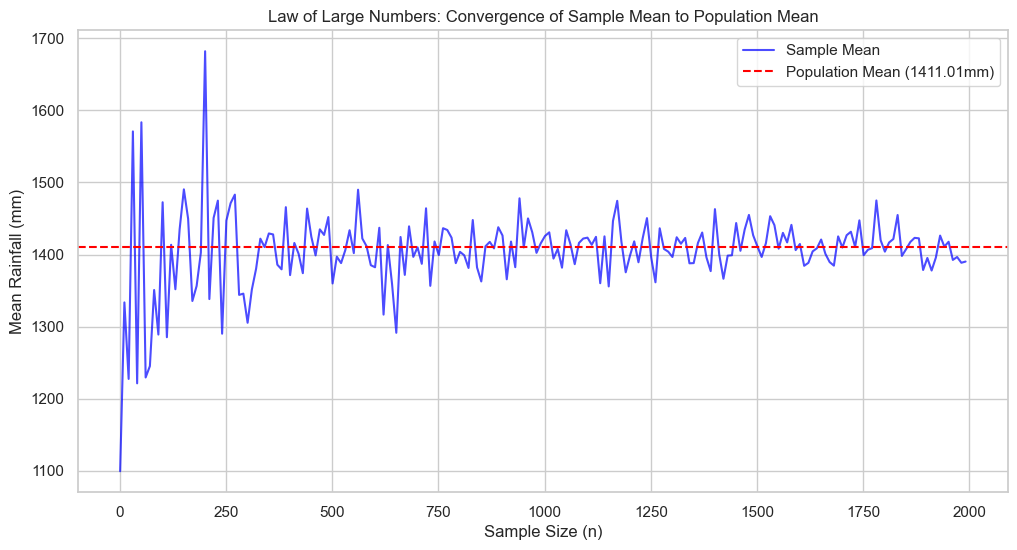

In [15]:
population_mean = annual_data.mean()
print(f"Population Mean of Annual Rainfall: {population_mean:.2f} mm")

# Create samples of increasing size
sample_sizes = np.arange(1, 2001, 10)
sample_means = []

# Shuffle the data to ensure random sampling without replacement (as a demo of LLN on fixed finite population)
# Or better, sample WITH replacement to simulate an infinite process
np.random.seed(42)
for n in sample_sizes:
    sample = np.random.choice(annual_data, size=n, replace=True)
    sample_means.append(sample.mean())

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, sample_means, label='Sample Mean', color='blue', alpha=0.7)
plt.axhline(y=population_mean, color='red', linestyle='--', label=f'Population Mean ({population_mean:.2f}mm)')

plt.title('Law of Large Numbers: Convergence of Sample Mean to Population Mean')
plt.xlabel('Sample Size (n)')
plt.ylabel('Mean Rainfall (mm)')
plt.legend()
plt.show()